# Ханаев Антон ИАД-5
# преп. Фоменко Мария

# Домашнее задание 2.

Продолжаем знакомиться с библиотекой `tensorflow`.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

seed = 24

## Задание 1 -- tensorflow vs numpy (3 балла).

Сравните скорость работы функций над массивами в фреймворках tensorflow и numpy. Для этого реализуйте на нампае и тф'е следующее:

 * Сумму квадратов диагональных элементов квадратной матрицы. Например для матрицы
$$
 \begin{pmatrix}
     1& 0& 5\\
     -2& 8& 12\\
     4& 1& -5
 \end{pmatrix}
$$
 такая сумма будет равна $1^2 + 8^2 + (-5)^2 = 90$.
 * Угол между векторами в n-мерном пространстве. Напомним, что он вычисляется по формуле
 $$
     \arccos \cfrac{\left\langle x, y\right\rangle}{||x||\cdot ||y||}
 $$

 * Сумму элементов коммутатора квадратных матриц $A$ и $B$. Коммутатор матриц это матрица $C = AB - BA$.
 
Постройте графики зависимости времени выполнения операций от размера массивов (в логарифмическй шкале) для каждой задачи для tensorflow и numpy (три рисунка, по два графика на рисунок). Элементы матриц выбирайте случайным образом (через модуль tf.random и np.random соотвтетственно). Какой фреймворк оказывается быстрее? Как Вы думаете, почему?

Можете пользоваться образцом кода ниже.

**Замечание**. Графики должны быть опрятными! Подписывайте оси и единицы измерения, указывайте легенду. За неопрятные графики оценка за задание может быть снижена.

**Подсказка**. Функция time.time() возвращает время в секундах (с высокой точностью), прошедшее от 00:00 1 января 1970 года. Используйте её, чтобы посчитать, сколько длилось выполнение куска кода. Также вам могут пригодиться функции `tf.linalg.norm`, `tf.diag_part`, `tf.acos`, `tf.matmul`

In [2]:
def time_tf_sum_squared_diag_elements(n):
    sess = tf.Session()
    
    x = tf.random.uniform(shape=(n, n)) # define array(-s) of size n
    y = tf.reduce_sum(tf.diag_part(x)**2)
    
    begin = time.time()
    sess.run(y)
    end = time.time()
    time_spent = end - begin
    
    sess.close()
    
    return time_spent


def time_np_sum_squared_diag_elements(n):
    begin = time.time()
    
    x = np.random.uniform(size=(n, n)) # define array(-s) of size n
    y = np.sum(np.diagonal(x)**2)
    
    end = time.time()
    time_spent = end - begin
    return time_spent

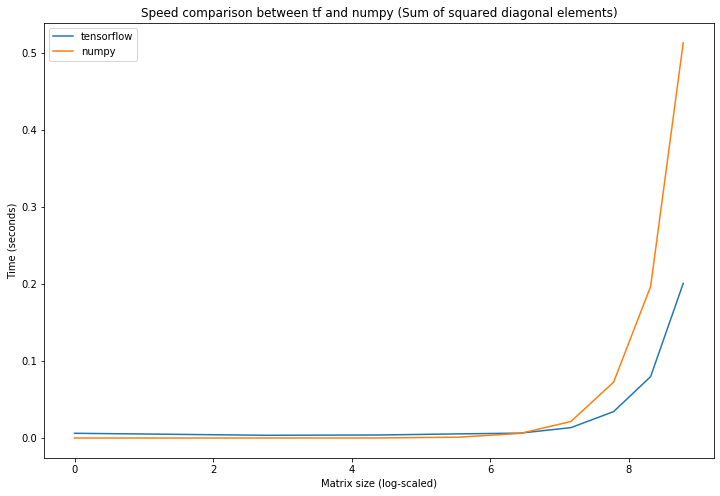

In [3]:
np.random.seed(seed)
tf.random.set_random_seed(seed)


array_sizes = [(i**4) for i in range(1, 10)]
tf_time = []
numpy_time = []
for n in array_sizes:
    time_tf_curr = time_tf_sum_squared_diag_elements(n)
    tf_time.append(time_tf_curr)
    time_np_curr = time_np_sum_squared_diag_elements(n)
    numpy_time.append(time_np_curr)


# plot results
plt.figure(figsize=(12, 8))
plt.plot(np.log(array_sizes), tf_time, label='tensorflow')
plt.plot(np.log(array_sizes), numpy_time, label='numpy')
plt.legend()
plt.xlabel('Matrix size (log-scaled)')
plt.ylabel('Time (seconds)')
plt.title('Speed comparison between tf and numpy (Sum of squared diagonal elements)')
plt.show()

In [4]:
def time_tf_angle(n):
    sess = tf.Session()

    x1 = tf.random.uniform(shape=(n, 1)) # define array(-s) of size n
    x2 = tf.random.uniform(shape=(1, n))
    dot_product = tf.matmul(x2, x1)
    x1_norm = tf.norm(x1)
    x2_norm = tf.norm(x2)
    
    y = tf.acos(dot_product/(x2_norm*x1_norm))

    begin = time.time()
    sess.run(y)
    end = time.time()
    time_spent = end - begin
    
    sess.close()
    
    return time_spent


def time_np_angle(n):
    begin = time.time()
    
    x1 = np.random.uniform(size=(n, 1)) # define array(-s) of size n
    x2 = np.random.uniform(size=(1, n))
    dot_product = np.matmul(x2, x1)
    x1_norm = np.linalg.norm(x1)
    x2_norm = np.linalg.norm(x2)
    y = np.arccos(dot_product/(x1_norm*x2_norm))
    
    end = time.time()
    time_spent = end - begin
    
    return time_spent

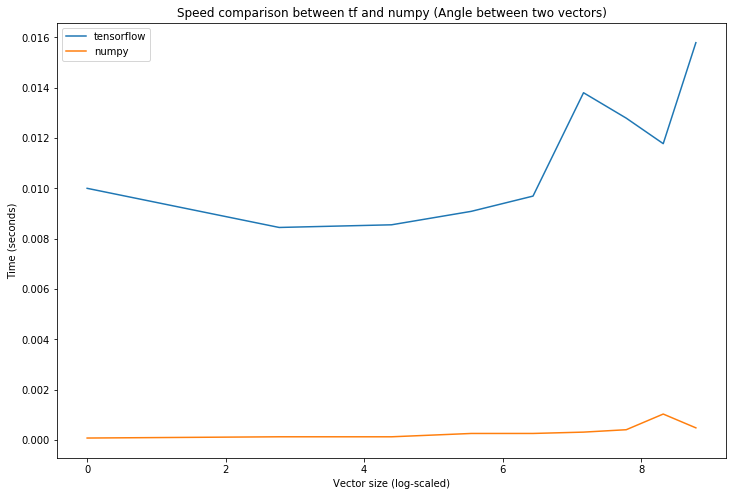

In [5]:
np.random.seed(seed)
tf.random.set_random_seed(seed)

array_sizes = [(i**4) for i in range(1, 10)]

tf_time = []
numpy_time = []

for n in array_sizes:
    time_tf_curr = time_tf_angle(n)
    tf_time.append(time_tf_curr)
    time_np_curr = time_np_angle(n)
    numpy_time.append(time_np_curr)


# plot results
plt.figure(figsize=(12, 8))
plt.plot(np.log(array_sizes), tf_time, label='tensorflow')
plt.plot(np.log(array_sizes), numpy_time, label='numpy')
plt.legend()
plt.xlabel('Vector size (log-scaled)')
plt.ylabel('Time (seconds)')
plt.title('Speed comparison between tf and numpy (Angle between two vectors)')
plt.show()

In [6]:
def time_tf_commutator(n):
    sess = tf.Session()

    x1 = tf.random.uniform(shape=(n, n)) # define array(-s) of size n
    x2 = tf.random.uniform(shape=(n, n))
    AB = tf.matmul(x1, x2)
    BA = tf.matmul(x2, x1)
    
    C = AB - BA

    begin = time.time()
    sess.run(C)
    end = time.time()
    time_spent = end - begin
    
    sess.close()
    
    return time_spent


def time_np_commutator(n):
    begin = time.time()
    
    x1 = np.random.uniform(size=(n, n)) # define array(-s) of size n
    x2 = np.random.uniform(size=(n, n))
    
    AB = np.matmul(x1, x2)
    BA = np.matmul(x2, x1)
    
    C = AB - BA
    
    end = time.time()
    time_spent = end - begin
    
    return time_spent

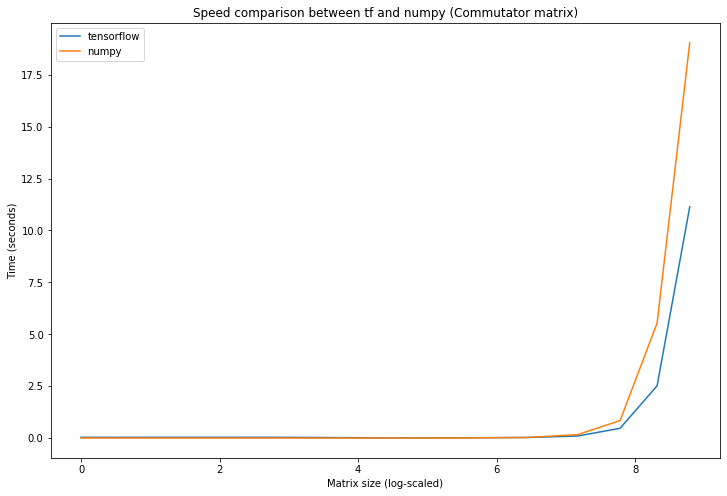

In [7]:
np.random.seed(seed)
tf.random.set_random_seed(seed)

array_sizes = [(i**4) for i in range(1, 10)]

tf_time = []
numpy_time = []

for n in array_sizes:
    time_tf_curr = time_tf_commutator(n)
    tf_time.append(time_tf_curr)
    time_np_curr = time_np_commutator(n)
    numpy_time.append(time_np_curr)


# plot results
plt.figure(figsize=(12, 8))
plt.plot(np.log(array_sizes), tf_time, label='tensorflow')
plt.plot(np.log(array_sizes), numpy_time, label='numpy')
plt.legend()
plt.xlabel('Matrix size (log-scaled)')
plt.ylabel('Time (seconds)')
plt.title('Speed comparison between tf and numpy (Commutator matrix)')
plt.show()

# Как видно из графиков, при сравнительно малом количестве элементов numpy работает быстрее tensorflow, однако при больших данных tensorflow показывает себя заметно лучше. Смею предположить, что это происходит из-за того, что tf более оптимизирован под работу с тензорами бОльших размеров и дименшэнов. Также tf тратит много времени на 

## Задание 2 -- градиенты и оптимайзеры (3 балла).

Продолжим работать с датасетом MNIST с размером картинок 8х8.

In [8]:
from sklearn.datasets import load_digits

mnist = load_digits()

X, y = mnist.data, mnist.target

n_labels = len(np.unique(y))

Многие алгоритмы оптимизации имплементированы в `tensorflow`. В этом задании мы сравним их при одинаковых параметрах, а также переберём разные параметры для одного алгоритма.

**Задание 2.1** (1.5 балла). Исследуйте вклад параметра momentum в методу `tf.train.MomentumOptimizer`. Для этого для разных значений momentum постройте графики значения функции потерь от номера итерации. При каких значениях momentum алгоритм сходится быстрее? Используйте `learning_rate=0.01`.

**Замечание**. В этом задании используется многоклассовая логистическая регрессия. Не меняйте код модели в ячейке ниже.

In [9]:
tf.reset_default_graph()

w = tf.Variable(np.ones((X.shape[1], n_labels)), dtype="float32")
X_input = tf.placeholder("float32", (None, X.shape[1]))
y_input = tf.placeholder("int32", (None,))

predicted = tf.nn.softmax(X_input @ w)
loss = tf.losses.log_loss(tf.one_hot(y_input, depth=n_labels), predicted)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
def train(X, y, train_op, batch_size=16):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        n_batch_train = len(X) // batch_size
        for epoch in range(1):
            loss_history = []
            for b in range(n_batch_train):
                _, loss_ = sess.run([train_op, loss], feed_dict={X_input: X[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history.append(loss_)
    return loss_history

In [11]:
# YOUR CODE !
learning_rate = 0.01
momentum_values = [0.15*i for i in range(1, 6)]
d = {}
for momentum in momentum_values:
    optimizer = tf.train.MomentumOptimizer(learning_rate, momentum)
    d[momentum] = train(X, y, optimizer.minimize(loss))

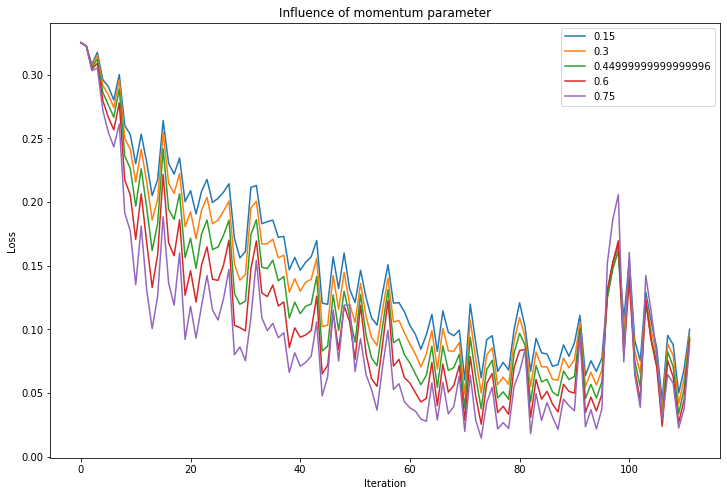

In [12]:
# plot results
plt.figure(figsize=(12, 8))
for momentum in d:
    plt.plot(np.arange(len(d[momentum])), d[momentum], label=str(momentum))
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Influence of momentum parameter')
plt.show()

# Ваш ответ: чем больше momentum, тем быстрее сходится градиент и меньше ошибка, однако если близко к локальному минимуму learning_rate слишком большой, то мы начинаем перепрыгивать через него, из-за чего ошибка будет расти быстрее, чем при меньшем momentum параметре

**Задание 2.2** (0.5 баллa). Исследуйте вклад `learning_rate`. Для этого для разных значений `learning_rate` постройте графики значения функции потерь от номера итерации. При каких значениях длины шага градиентного спуска алгоритм сходится быстрее? Используйте параметр метод MomentumOptimizer с параметром, который вы считаете лучшим по итогам предыдущего задания.

In [13]:
# YOUR CODE !
momentum = 0.7
lr_values = [0.001, 0.005, 0.01, 0.03, 0.08, 0.1]
d = {}
for lr in lr_values:
    optimizer = tf.train.MomentumOptimizer(lr, momentum)
    d[lr] = train(X, y, optimizer.minimize(loss))

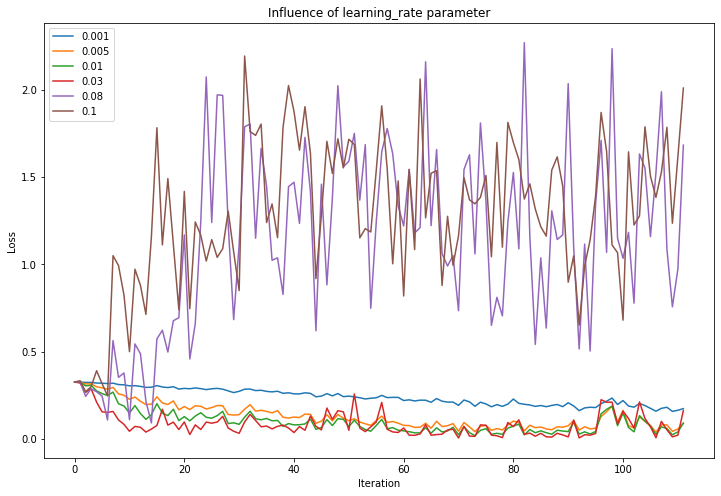

In [14]:
# plot results
plt.figure(figsize=(12, 8))
for lr in d:
    plt.plot(np.arange(len(d[lr])), d[lr], label=str(lr))
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Influence of learning_rate parameter')
plt.show()

# Ваш ответ: как видно из графика, слишком большой learning rate только увеличивает ошибку, в то время как слишком маленький  (0.001) уменьшает ошибку постепенно, но чересчур медленно. Наиболее оптимальный learning_rate находится около 0.03

**Задание 2.3** (0.5 балла) Проделайте то же, что и в пункте выше, но используйте в качестве базового алгоритма оптимизации `Adam` с дефолтными параметрами.

In [15]:
# YOUR CODE !
lr_values = [0.001, 0.005, 0.01, 0.03, 0.08, 0.1]
d = {}
for lr in lr_values:
    optimizer = tf.train.AdamOptimizer(lr)
    d[lr] = train(X, y, optimizer.minimize(loss))

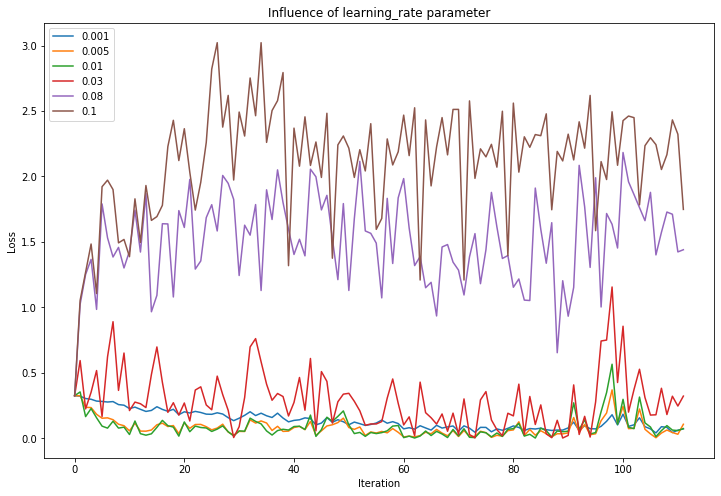

In [16]:
plt.figure(figsize=(12, 8))
for lr in d:
    plt.plot(np.arange(len(d[lr])), d[lr], label=str(lr))
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Influence of learning_rate parameter')
plt.show()

# Ваш ответ: для этого метода оптимизации лучше брать маленькие learning_rate, ибо иначе градиент начинает осцилировать, из-за чего ошибка либо остается примерно такой же, либо значительно увеличивается. Лучше поэтому начинать с большого learning rate, чтобы была возможность выпрыгнуть из локального минимума, а затем уменьшать его постепенно для сходимости в (надеемся) глобальном

**Задание 2.4** (0.5 балла) Сравните алгоритмы `Adam` и `Momentum` для данной задачи. Какой показывает себя лучше?

In [17]:
# YOUR CODE ! 
momentum = 0.9
lr_values = [0.001, 0.003, 0.01]
d_adam = {}
d_momen = {}
for lr in lr_values:
    optimizer = tf.train.AdamOptimizer(lr)
    d_adam[lr] = train(X, y, optimizer.minimize(loss))
    optimizer = tf.train.MomentumOptimizer(lr, momentum)
    d_momen[lr] = train(X, y, optimizer.minimize(loss))

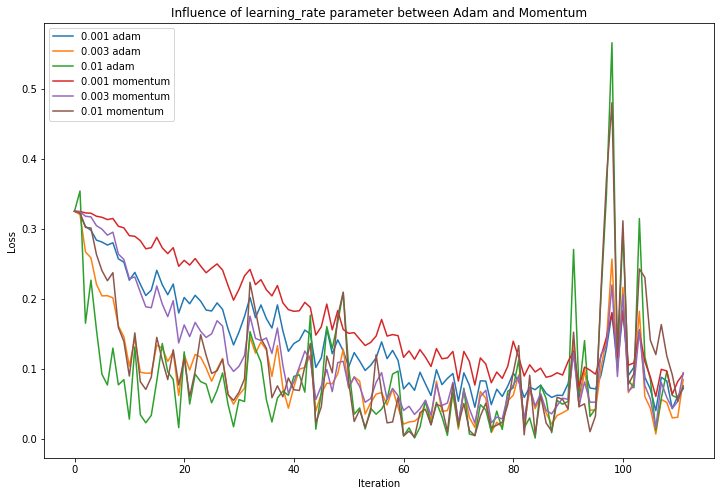

In [18]:
plt.figure(figsize=(12, 8))
for lr in lr_values:
    plt.plot(np.arange(len(d_adam[lr])), d_adam[lr], label=str(lr)+' adam')
for lr in lr_values:
    plt.plot(np.arange(len(d_momen[lr])), d_momen[lr], label=str(lr)+' momentum')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Influence of learning_rate parameter between Adam and Momentum')
plt.show()

# Ваш ответ: Adam заметно быстрее сходится на первых итерациях, причем даже если learning rate не совсем оптимален, то результат все равно очень хороший, однако если смотреть на дистанции, то momentum optimizer показывает схожие результаты при правильно подобранных параметрах

## Задание 3 -- наша первая нейросеть, часть 2 (4 балла).

В этом задании мы напишем нейросеть для работы с датасетом MNIST размера 28х28. Исользовать можно только полносвязные (dense) слои! Для этого мы "вытянем" картинки 28х28 в длинный вектор размера 784.

In [19]:
from mnist import load_dataset

X_train, y_train, X_test, y_test, _, _ = load_dataset()

X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)

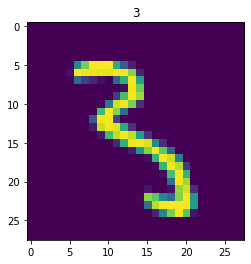

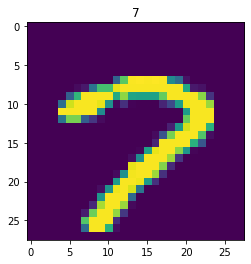

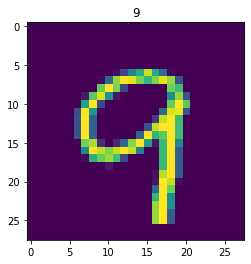

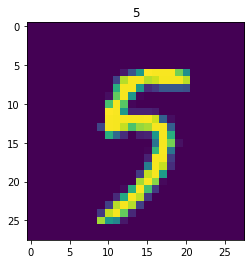

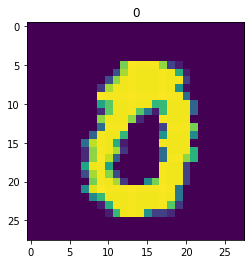

In [20]:
for i in [228, 1437, 322, 420, 69]:
    plt.title(y_train[i])
    plt.imshow(X_train[i].reshape((28, 28)))
    plt.show()

Подберите архитектуру и алгоритм оптимизации так, чтобы значение accuracy на тестовой выборке было не менее 97.5.

In [21]:
from sklearn.metrics import accuracy_score
tf.reset_default_graph()

def train_and_validate(X_train, y_train, X_test, y_test, train_op, batch_size=16):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        n_batch_train = len(X_train) // batch_size
        n_batch_test = len(X_test) // batch_size
        for epoch in range(4):
            loss_history_train = []
            for b in range(n_batch_train):
                _, loss_ = sess.run([train_op, loss], feed_dict={X_input: X_train[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y_train[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history_train.append(loss_)

        for epoch in range(1):
            loss_history_test = []
            prediction_history = []
            for b in range(n_batch_test):
                loss_, predicted_ = sess.run([loss, predicted], feed_dict={X_input: X_test[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y_test[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history_test.append(loss_)
                prediction_history += predicted_.argmax(-1).tolist()
            print("Test accuracy: ", accuracy_score(y_test, prediction_history))
    return loss_history_train, loss_history_test

X_input = tf.placeholder("float32", (None, 784)) # dim = [batch_size, 784]
y_input = tf.placeholder("int32", (None,)) # dim = [batch_size,]

### Я увеличил количество эпох до 4, так как модель недообучалась. Это позволило модели "увидеть" каждый объект данных несколько раз, что позволило стабилизировать процесс обучения, ибо если какой-то батч заметно отличается от остальных, то изменение ошибки не будет таким острым

In [22]:
np.random.seed(seed)
np.random.shuffle(X_train)

np.random.seed(seed)
np.random.shuffle(y_train)

tf.random.set_random_seed(seed)

layer1 = tf.layers.dense(inputs=X_input, units=512, activation=tf.nn.sigmoid)
layer2 = tf.layers.dense(inputs=layer1, units=256, activation=tf.nn.sigmoid)
layer3 = tf.layers.dense(inputs=layer2, units=128, activation=tf.nn.sigmoid)
logits = tf.layers.dense(inputs=layer3, units=10, activation=None)

predicted = tf.nn.softmax(logits=logits, axis=1)
ohe = tf.one_hot(y_input, 10)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=ohe, logits=logits))#<define log loss with one-hot vector of labels
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

loss_history_train, loss_history_test = train_and_validate(X_train, y_train, X_test, y_test, train_op)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Test accuracy:  0.9728


## Задание 4 (0.1 баллов).

**Задание 4.1**. (0.1 баллов) Оставьте ниже смешную картинку (желательно про машинное обучение). Лучшую картинку мы поставим на аватарку чатика "Флуд про ИАД".

![Jeeza](https://scontent-frx5-1.xx.fbcdn.net/v/t1.0-9/67681766_756119978175838_5282645504465829888_n.png?_nc_cat=107&_nc_oc=AQnLoLuPz2JrCOugJLkpJtzBqA1kASaxzfehZ9YXIHjyE0PYqU7CDy9IyrlF1iFnZc4&_nc_ht=scontent-frx5-1.xx&oh=d6fed6f1de184b7887ed7a54b467df5b&oe=5E24B8EC)

**Задание 4.2**. Напищите ниже фидбек по заданию и по курсу в целом. 

Задания интересные, правди иногда бывает непонятно как именно необходимо реализовать тот или иной функционал
Курс клевый, только хотелось бы PyTorch